### Inhaltsverzeichnis
1. A
2. B
3. C
4. D
5. F
6. G

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier 

# Datensäuberung

In [102]:
df = pd.read_csv(r'../Datensätze/breas_cancer_data.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Nachdem wir uns einen ersten Überblick über das Dataset verschafft haben, haben wir es bereinigt und die Label von string zu integer konvertiert. 

In [103]:
#Bereinigen des Datensets
#Alle NaN werden gedroppt
#Konvertieren der Diagnose Strings in Integer
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})
df = df.dropna(axis=1, how='all')

# Aufteilen in Features und Labels
Diagnosis = df.iloc[:,0]
Data = df.iloc[:,1:]

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


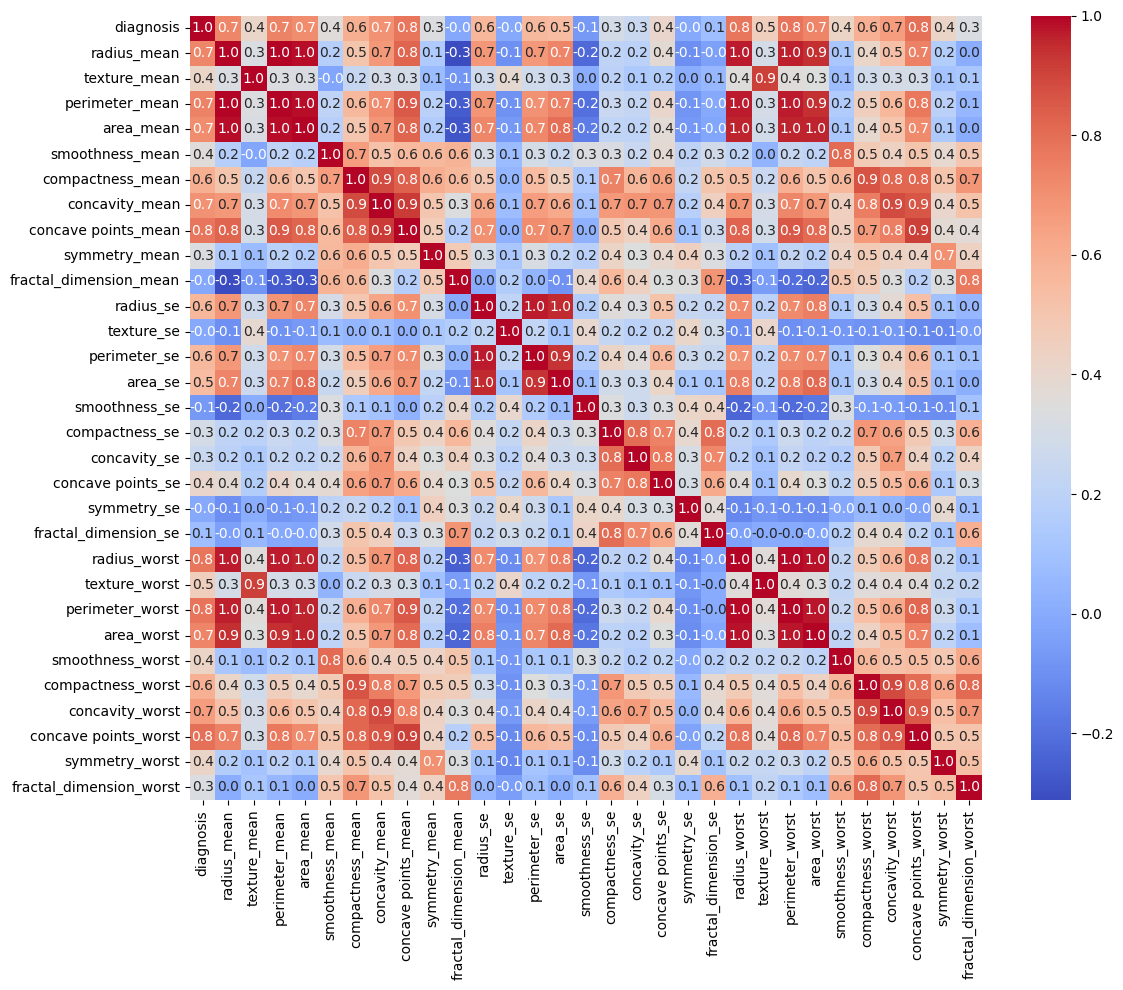

In [104]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.tight_layout()


Nachdem wir uns einen guten Überblick über das Dataset verschafft haben und Schlüsse aus der Korrelation verschiedener Features ziehen konnten. Somit sehen wir, dass radius_mean, perimeter_mean und area_mean eine hohe Korrelation haben. Das bedeutet, dass diese Daten redundant sind und für ein ineffizientes Training sorgen. Wir können redundante Daten entfernen, um ein effizienteres Training zu gewährleisten und die Genauigkeit ggf. zu verbessern.
Wir entfernen also:

Da redundant zu radius_mean:
1. perimeter_mean
2. area_mean

Da redundant zu radius_worst:
1. perimeter_worst
2. area_worst

Da reduntant zu radius_se:
1. area_se
2. perimeter_se

Da redundant zu concave points_worst:
1. concavity_worst
2. compactness_worst

Da redundant zu concave points_mean:
1. concavity_mean
2. compactness_mean

Da kaum Korrelation zu diagnosis:
1. symmetrie_se
2. fractal_dimension_mean
3. fractal_dimension_se
4. smoothness_se
5. texture_se
6. symmetry_mean
7. compactness_se
8. concavity_se
9. concave points_se
10. fractal_dimension_worst

In [105]:
# Liste aller Features, die aus dem Dataset entfernt werden sollen
features_zum_entfernen = [
    'perimeter_mean', 
    'area_mean', 
    'perimeter_worst', 
    'area_worst', 
    'symmetry_se', 
    'fractal_dimension_mean', 
    'fractal_dimension_se',
    'smoothness_se',
    'texture_se',
    'area_se',
    'perimeter_se',
    'concavity_worst',
    'compactness_worst',
    'concavity_mean',
    'compactness_mean',
    'concavity_se',
    'concave points_se',
    'symmetry_mean',
    'compactness_se',
    'fractal_dimension_worst'
]



In [106]:
# Erstellen eines neuen Dataframes, der auf die wichtigsten Features reduziert wurde
df_cleaned = df.drop(columns=features_zum_entfernen)

# Aufteilen in Features und Label
Diagnosis_cleaned = df_cleaned.iloc[:,0]
Data_cleaned = df_cleaned.iloc[:,1:]

df_cleaned.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,concave points_mean,radius_se,radius_worst,texture_worst,smoothness_worst,concave points_worst,symmetry_worst
id,,,,,,,,,,,
842302,1,17.99,10.38,0.11840,0.14710,1.0950,25.38,17.33,0.1622,0.2654,0.4601
842517,1,20.57,17.77,0.08474,0.07017,0.5435,24.99,23.41,0.1238,0.1860,0.2750
84300903,1,19.69,21.25,0.10960,0.12790,0.7456,23.57,25.53,0.1444,0.2430,0.3613
84348301,1,11.42,20.38,0.14250,0.10520,0.4956,14.91,26.50,0.2098,0.2575,0.6638
84358402,1,20.29,14.34,0.10030,0.10430,0.7572,22.54,16.67,0.1374,0.1625,0.2364


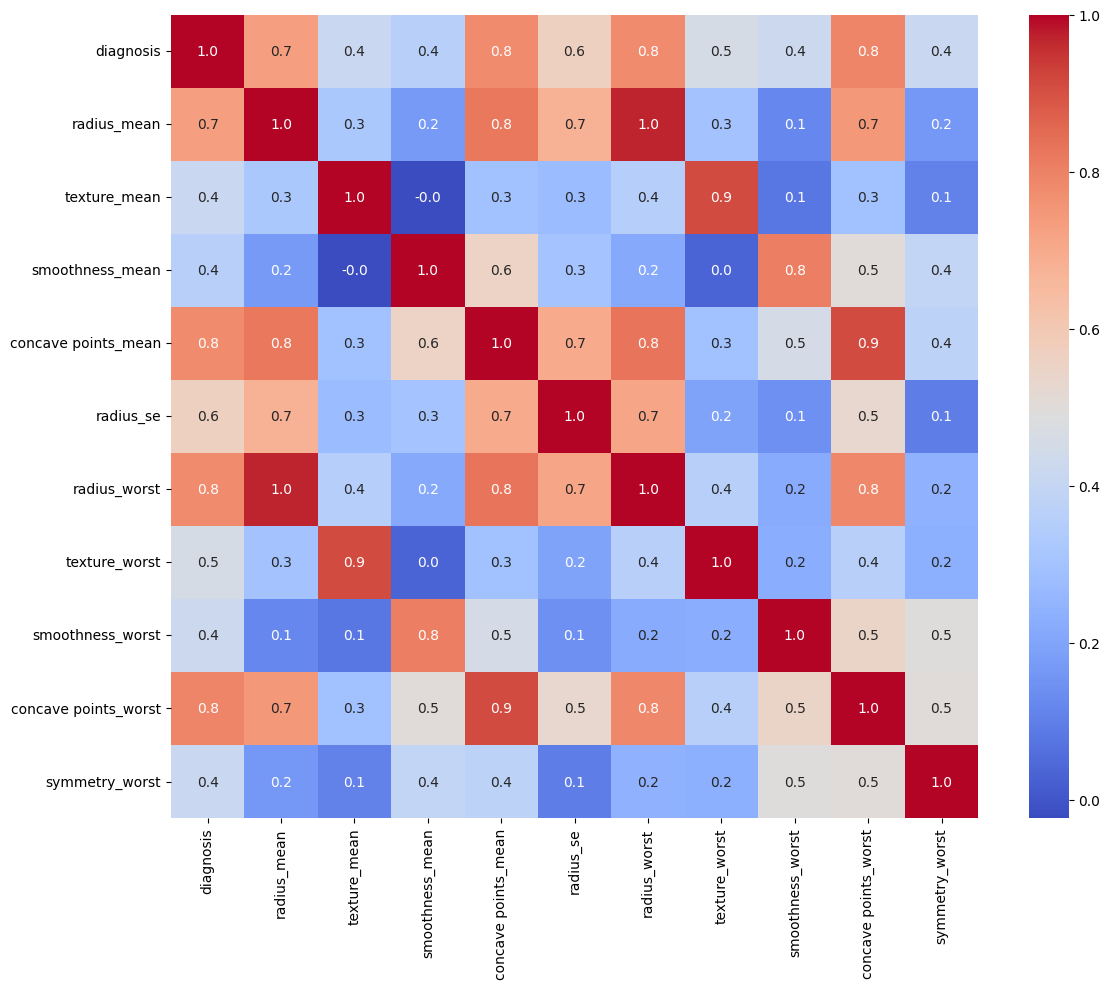

In [107]:
# Plotten einer Korrelationsmatrix des neuen Dataframes
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.tight_layout()

Nun wird überprüft, ob die Genauigkeit durch das Entfernen überflüssiger Daten beeinflusst wurde. Dazu wird die cross_val_score() Funktion auf zwei Modelle angewandt. Einmal wird der Funktion das ursprünglich Dataset übergeben und das andere Mal das reduzierte Dataset. Als Ausgabe erhalten wir die Durchschnittsgenauigkeit und können Schlüsse über den Erfolg einer Datenreduktion ziehen.

In [108]:
RF_Model_c = RandomForestClassifier(random_state=42)
RF_Model = RandomForestClassifier(random_state=42)

# 5-fache Cross-Validation auf den bereinigten Daten
cv_scores_c = cross_val_score(RF_Model_c, Data_cleaned, Diagnosis_cleaned, cv=20, scoring='accuracy')
cv_scores = cross_val_score(RF_Model, Data, Diagnosis, cv=20, scoring='accuracy')
 
# Ausgabe der durchschnittlichen Genauigkeit über alle Folds
print(f"Durchschnittliche Genauigkeit für Cleaned: {cv_scores_c.mean()}")
print(f"Durchschnittliche Genauigkeit für Normal: {cv_scores.mean()}")

Durchschnittliche Genauigkeit für Cleaned: 0.9720443349753696
Durchschnittliche Genauigkeit für Normal: 0.9615147783251231


Alleine durch das Entfernen redundanter und irrelevanter Daten, konnte die Genauigkeit über 1% gesteigert werden. Auch wenn das Ergebnis der Intuition widerspricht, dass mehr Daten ein besseres Training ermöglichen, macht das Ergebnis durchaus Sinn.
Auch wenn RandomForests nicht unbedingt anfällig für Overfitting sind, sind sie auch nicht Imun. Außerdem wird durch das Entfernen der irrelevanten Daten das Rauschen des Modells verringert.
Somit kommen wir zum Schluss, dass wir für das Training das reduzierte Dataset nutzen.

# RandomForest und Parameter

Nun ist an der Zeit einen RandomForest zu trainieren. Wir trainieren ihn erstmal mit den standart Parametern und plotten ihn anschließend, um uns über die Struktur eines solchen Baumes Überblick zu verschaffen. Anschließend konzentrieren wir uns auf die Optimierung des Classifiers durch Hyperparameter-Tuning. 

In [109]:
# Aufteilen der Daten in Test-, Val- und Trainingsdaten
X_train, X_test, y_train, y_test = train_test_split(Data_cleaned, Diagnosis_cleaned, random_state=42, test_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

[Text(0.6527777777777778, 0.9375, 'X[5] <= 17.54\ngini = 0.463\nsamples = 195\nvalue = [202, 116]\nclass = y[0]'),
 Text(0.4166666666666667, 0.8125, 'X[8] <= 0.142\ngini = 0.146\nsamples = 133\nvalue = [197, 17]\nclass = y[0]'),
 Text(0.2222222222222222, 0.6875, 'X[4] <= 0.454\ngini = 0.041\nsamples = 119\nvalue = [189, 4]\nclass = y[0]'),
 Text(0.1111111111111111, 0.5625, 'X[6] <= 31.635\ngini = 0.031\nsamples = 115\nvalue = [185, 3]\nclass = y[0]'),
 Text(0.05555555555555555, 0.4375, 'gini = 0.0\nsamples = 102\nvalue = [167, 0]\nclass = y[0]'),
 Text(0.16666666666666666, 0.4375, 'X[3] <= 0.025\ngini = 0.245\nsamples = 13\nvalue = [18, 3]\nclass = y[0]'),
 Text(0.1111111111111111, 0.3125, 'gini = 0.0\nsamples = 8\nvalue = [14, 0]\nclass = y[0]'),
 Text(0.2222222222222222, 0.3125, 'X[5] <= 13.735\ngini = 0.49\nsamples = 5\nvalue = [4, 3]\nclass = y[0]'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]\nclass = y[0]'),
 Text(0.2777777777777778, 0.1875, 'X[9] 

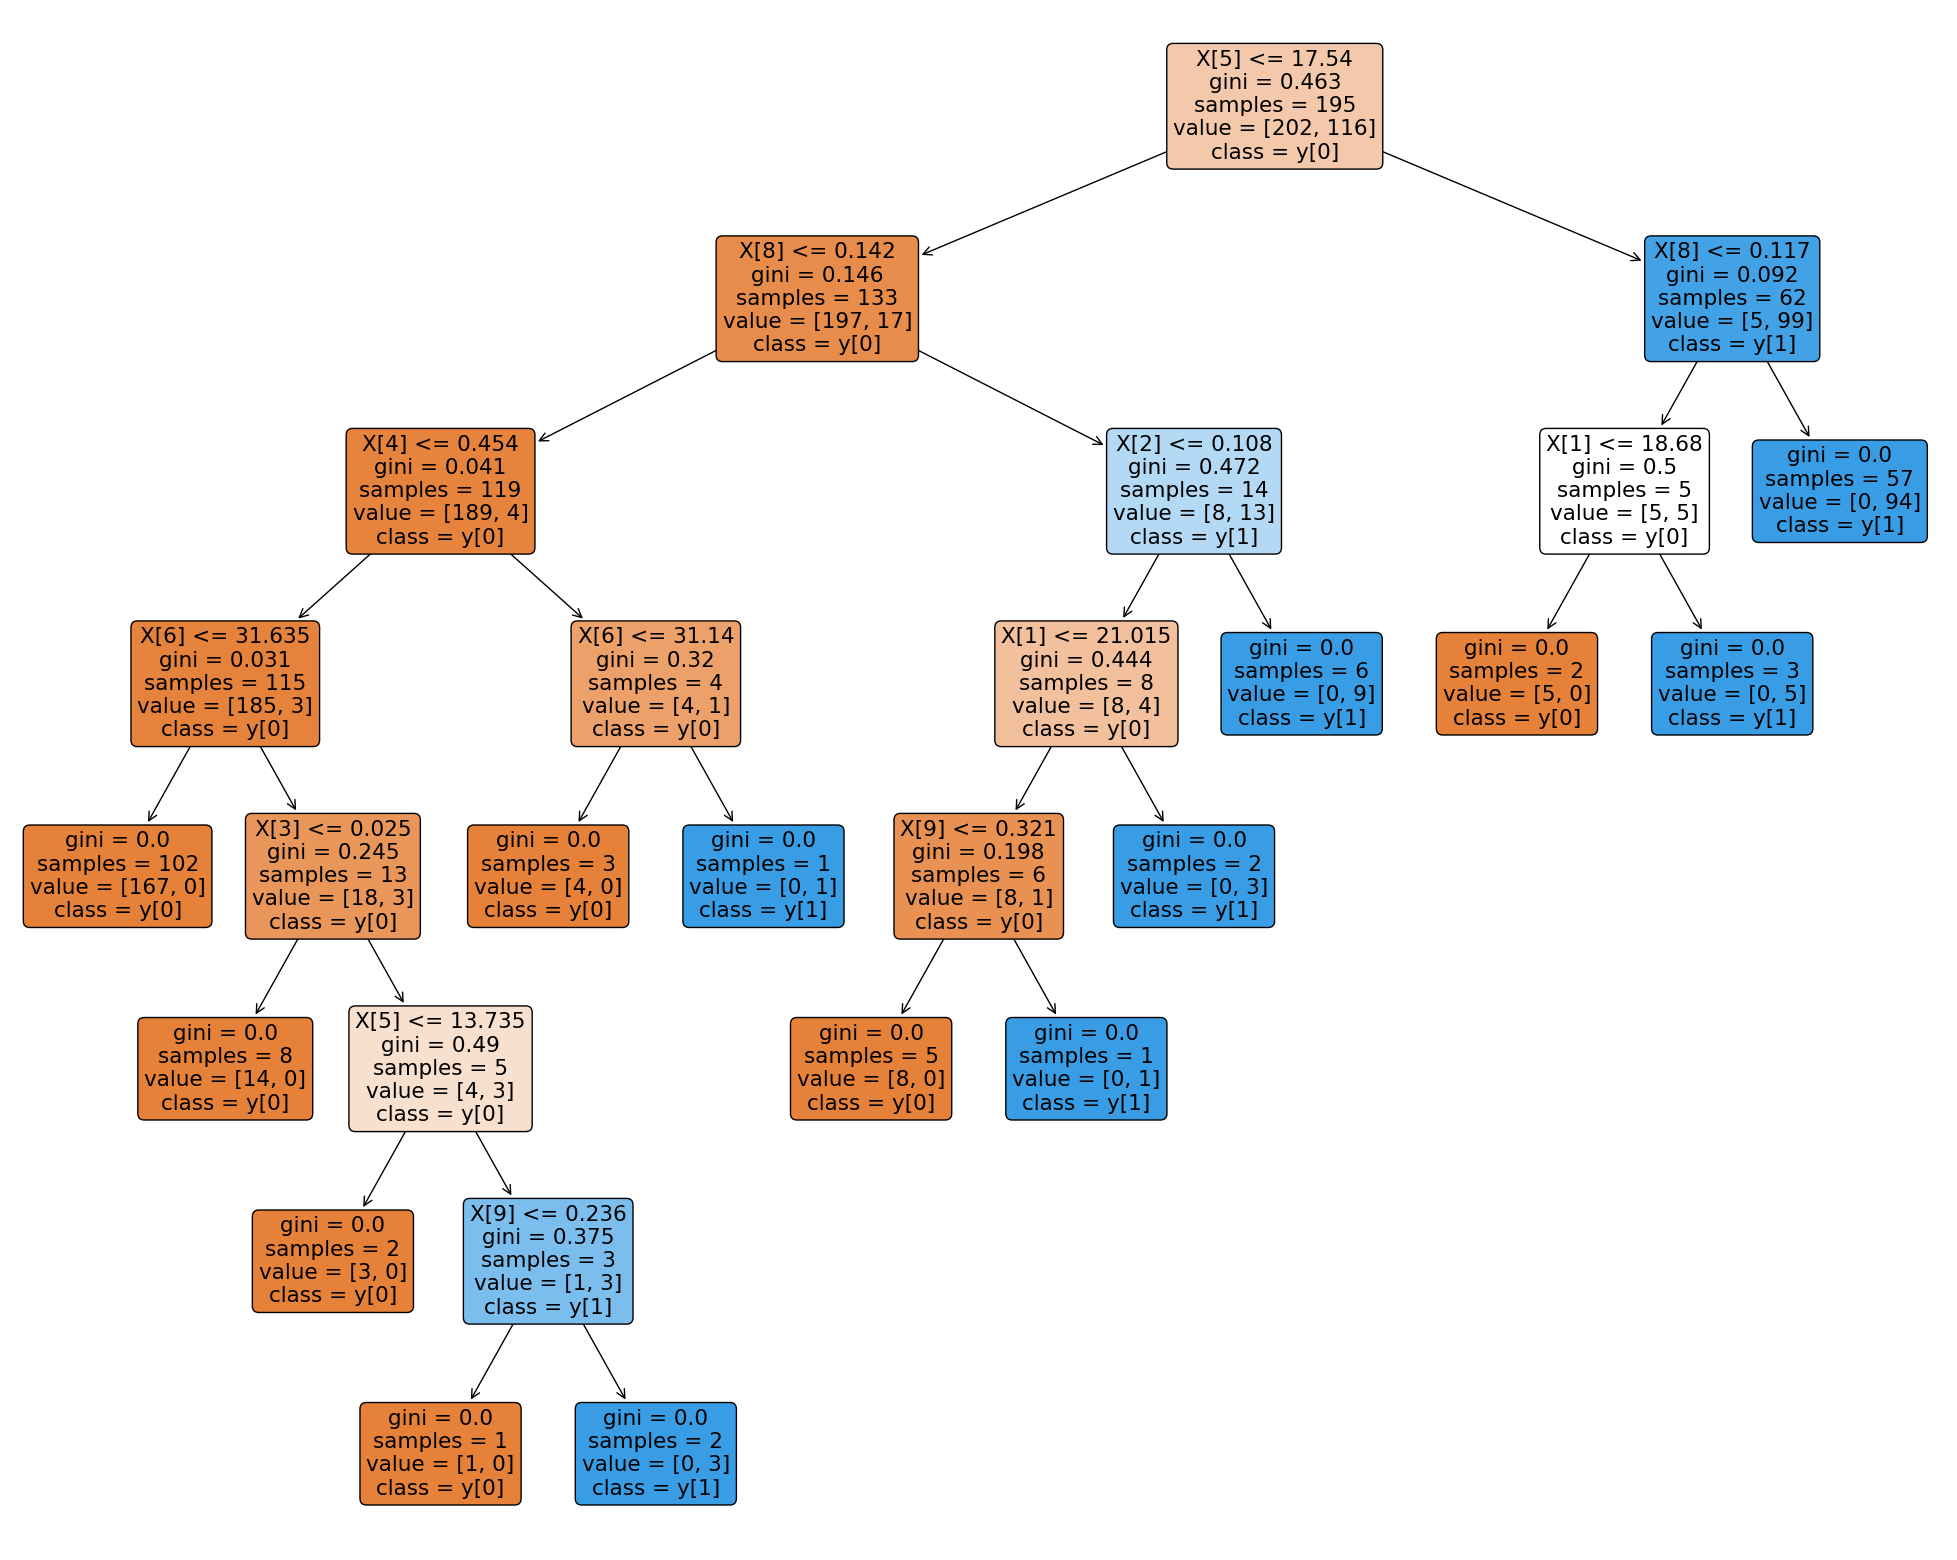

In [111]:
# Trainieren des Modells
RF_Model_c.fit(X_train, y_train)

# Erzeuge eine Figur mit einer geeigneten Größe
fig = plt.figure(figsize=(25, 20))
plt.tight_layout()

# Visualisiere den Entscheidungsbaum
tree.plot_tree(RF_Model_c.estimators_[1], filled = True , rounded = True, class_names = True)


Es ist an der Zeit sich mit den bereits genannten Hyperparametern zu beschäftigen. Doch welche Parameter existieren überhaupt?

In [86]:
print(RF_Model_c.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## Forest Parameter

Aufgrund unseres Datasets könne wir schon gleich zu Beginn gewisse Parameter bestimmen. Dazu zählen:
obb_score: Diesen Parameter können wir gleich auf "False" setzen, da wir eine Cross-Validierung verwenden werden
..........
........
....


## Ausprobieren :

Im folgenden werden wir einfach ein paar Hyperparameter verstellen und sehen was passiert.
Die Hyperparameter die wir verstellen sind : Bootstrap, Max_depth, Max_samples und n_estimators

In [112]:
RF_Testing = RandomForestClassifier(
    bootstrap= True,         
    max_depth=1,            
    max_samples=0.1,        
    n_estimators=1          
)
RF_Testing.fit(X_train, y_train)
y_pred = RF_Testing.predict(X_valid)
RF_Testing_Accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {RF_Testing_Accuracy}")

Accuracy: 0.8375


Wie man unschwer erkennen kann ist es nicht von Vorteil die Hyperparameter zu Raten  

### GridSearch CV

Wie bereits erwähnt, ist das Raten von Hyperparametern ineffizient und führt oft zu suboptimalen Ergebnissen. Daher verwenden wir GridSearchCV, ein Werkzeug aus der scikit-learn-Bibliothek. Mit GridSearchCV definieren wir ein Gitter möglicher Hyperparameter-Kombinationen, die systematisch getestet werden.

Hierzu definieren wir zu Anfang dei Hyperparameter, welche wir verändern wollen.

In [ ]:
# Text der alles erklärt!!!

n_estimators = list(range(10,300,20))
# Max _features steuert wie viele Features zufällig ausgewählt werden sollen umd einen besten Split am Knoten zu bekommen
max_features = ['auto','sqrt','log2']
# Max_depth ist die maximale Tiefe / Ebene
max_depth = [2,4]
#min_sample_split bestimmt wann der Knoten nicht weiter aufgeteilt wird

min_sample_split = [2,5]

min_sample_leaf = list(range(1,100,3))

bootstrap = [True, False]

criterion = ['gini', 'entropy']

class_weight = ['balanced']


## TEXT FÜR DAS PARAM GRID!

In [ ]:
param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'bootstrap': bootstrap,
    'min_samples_leaf': min_sample_leaf,
    'min_samples_leaf' : min_sample_split,
    'criterion' : criterion,
    'class_weight' : class_weight
}
# TEXT!!!

## ..............

In [ ]:
Rf_GridSearch = RandomForestClassifier()

Rf_Grid = GridSearchCV(estimator = Rf_GridSearch, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = 4)

Rf_Grid.fit(X_train, y_train)

Best_Parameter  = Rf_Grid.best_params_
print(Best_Parameter)





Nun werden wir das Modeell mit den gefundende Parametern testen

In [ ]:
# Versuch, Random Forest mit den getunten Parametern zu erstellen
RF_Tune = RandomForestClassifier(**Best_Parameter)

RF_Tune.fit(X_train, y_train)
y_pred_RF_Tune = RF_Tune.predict(X_valid)
RF_Tune_Accuracy = accuracy_score(y_valid, y_pred_RF_Tune)
print(f"Accuracy: {RF_Tune_Accuracy}")

## Visualisierung von Hyperparameter Tuning

In [ ]:
Accuracy_Estimators = []

for n in range(2, 500, 3):
    RF_Estimators = RandomForestClassifier(n_estimators=n)
    RF_Estimators.fit(X_train, y_train)
    RF_Estimators_predictions = RF_Estimators.predict(X_test)
    RF_Estimators_Accuracy = accuracy_score(y_test, RF_Estimators_predictions)
    Accuracy_Estimators.append(RF_Estimators_Accuracy)


In [ ]:
# Plotten der Ergebnisse
plt.plot(range(2, 500, 3), Accuracy_Estimators)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.grid()


## N_Estimators keine großen Auswirkungen

## ANDERE

In [ ]:
Accuracy_RF_Sample_Leaf = []

for n in range(1, 500):
    # Erstellen Sie den Klassifikator
    RF_Sample_Leaf = RandomForestClassifier(min_samples_leaf = n)
    RF_Sample_Leaf.fit(X_train, y_train)
    RF_Sample_Leaf_Predictions = RF_Sample_Leaf.predict(X_valid)
    RF_Sample_Leaf_Acc = accuracy_score ( y_valid, RF_Sample_Leaf_Predictions)


    Accuracy_RF_Sample_Leaf.append(RF_Sample_Leaf_Acc)




In [ ]:
plt.figure(figsize=(12, 6)) 

plt.plot(Accuracy_RF_Sample_Leaf)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.grid()


In [ ]:
RF_Sqrt = RandomForestClassifier()
RF_Log2 = RandomForestClassifier()

Finally, we will observe the effect of the max_features hyperparameter. This resembles the number of maximum features provided to each tree in a random forest.

We know that random forest chooses some random samples from the features to find the best split. Let’s see how varying this parameter can affect our random forest model’s performance.



In [ ]:
Accuracy_RF_Max_Features = []

for n in range(1, 300):
    # Erstellen Sie den Klassifikator
    RF_Max_Features = RandomForestClassifier(max_features = n)
    RF_Max_Features.fit(X_train, y_train)
    RF_Max_Features_Predictions = RF_Max_Features.predict(X_valid)
    RF_Max_Features_Acc = accuracy_score ( y_valid, RF_Max_Features_Predictions)


    Accuracy_RF_Max_Features.append(RF_Max_Features_Acc)


print(Accuracy_RF_Max_Features)

In [ ]:
plt.figure(figsize=(12, 6)) 

plt.plot(Accuracy_RF_Max_Features)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.grid()


In [ ]:
# Liste zur Speicherung der Accuracy für verschiedene max_depth-Werte
Accuracy_RF_Max_Depth = []

# Schleife für max_depth-Werte von 1 bis 300
for n in range(1, 300):
    # Erstellen des Klassifikators mit variablem max_depth
    RF_Max_Depth = RandomForestClassifier(max_depth=n)
    
    # Modelltraining
    RF_Max_Depth.fit(X_train, y_train)
    
    # Vorhersagen auf den Testdaten
    RF_Max_Depth_Predictions = RF_Max_Depth.predict(X_valid)
    
    # Berechnung der Accuracy
    RF_Max_Depth_Acc = accuracy_score(y_valid, RF_Max_Depth_Predictions)
    
    # Speichern der Accuracy für den aktuellen max_depth-Wert
    Accuracy_RF_Max_Depth.append(RF_Max_Depth_Acc)



In [ ]:
print(Accuracy_RF_Max_Depth)

In [ ]:
plt.figure(figsize=(12, 6)) 
plt.plot(Accuracy_RF_Max_Depth)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.grid()


In [ ]:
Rf_Valid = RandomForestClassifier()

Rf_Valid.fit(X_train, y_train)

Rf_Valid_pred = Rf_Valid.predict(X_valid)

Rf_Valid_Accuracy = accuracy_score(y_valid,Rf_Valid_pred)

print(Rf_Valid_Accuracy)

In [ ]:
Rf_GridSearch_Valid = RandomForestClassifier()

Rf_Grid_Valid = GridSearchCV(estimator = Rf_GridSearch_Valid, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = 4)

Rf_Grid_Valid.fit(X_train, y_train)

Best_Parameter_Val  = Rf_Grid_Valid.best_params_
print(Best_Parameter)





In [ ]:
Rf_Val = RandomForestClassifier(**Best_Parameter)

Rf_Val.fit(X_train, y_train)

Rf_Val_pred = Rf_Val.predict(X_valid)

Rf_Val_Accuracy = accuracy_score(y_valid,Rf_Val_pred)

print(Rf_Val_Accuracy)